In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)
m = 500
x1 = 5 * np.random.rand(m,1) - 3
y = 10 + (2 * x1) + x1 ** 2 +2 * x1 **3 + 10 * np.random.randn(m,1)

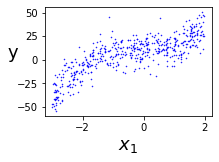

In [4]:
plt.figure(figsize=(3,2))
plt.plot(x1 ,y, "b.", markersize=1)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=1)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor

In [17]:
pip_reg = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scal', StandardScaler()),
    ('sgd', SGDRegressor(penalty='elasticnet', random_state=1))
])
#polynomial超參數degree，
#以及elasticnet的超參數：alpha, l1_ratio，
#都先沒放，因為後面要做調整

In [18]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = [{
    'poly__degree': [2,3,4],
    'sgd__alpha': [0.1, 1, 10], 
    'sgd__l1_ratio': [0, 0.5, 1]
}]

In [45]:
grid_search = GridSearchCV(pip_reg, param_grid, scoring='r2', return_train_score=True, cv=3)

grid_search.fit(x1_train, y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scal', StandardScaler()),
                                       ('sgd',
                                        SGDRegressor(penalty='elasticnet',
                                                     random_state=1))]),
             param_grid=[{'poly__degree': [2, 3, 4], 'sgd__alpha': [0.1, 1, 10],
                          'sgd__l1_ratio': [0, 0.5, 1]}],
             return_train_score=True, scoring='r2')

In [46]:
grid_search.best_score_

0.7329379166794469

In [47]:
grid_search.best_params_

{'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}

In [48]:
grid_model = grid_search.best_estimator_

grid_model.score(x1_test, y_test)

0.7287417714648952

In [52]:
grid_rlt = grid_search.cv_results_
for mean_score, params in zip(grid_rlt['mean_test_score'],grid_rlt['params']):
    print(mean_score, params)

0.6709144714185259 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0}
0.6729631263131383 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0.5}
0.6739838341338239 {'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}
0.5604173544087145 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 0}
0.6191871577349027 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 0.5}
0.6703784468578063 {'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_ratio': 1}
0.14710596880018803 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 0}
0.17066184581085764 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 0.5}
0.35965297018820436 {'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1_ratio': 1}
0.724812436785547 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0}
0.7292732003307676 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 0.5}
0.7329379166794469 {'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l1_ratio': 1}
0.6498673294136279 {'poly__degree': 3, 'sgd__alpha': 1, 'sgd__l

In [54]:
import pandas as pd

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_sgd__alpha,param_sgd__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.031049,0.039687,0.001942,0.002746,2,0.1,0,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.681827,0.620079,0.710837,0.670914,0.037847,13,0.677307,0.708229,0.655283,0.680273,0.021717
1,0.001662,0.000470,0.000666,0.000471,2,0.1,0.5,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.685450,0.619078,0.714362,0.672963,0.039889,12,0.679451,0.710540,0.657430,0.682474,0.021787
2,0.002000,0.000005,0.000660,0.000467,2,0.1,1,"{'poly__degree': 2, 'sgd__alpha': 0.1, 'sgd__l...",0.688785,0.616186,0.716980,0.673984,0.042459,11,0.680708,0.711576,0.658440,0.683575,0.021787
3,0.001332,0.000469,0.000663,0.000469,2,1,0,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.557087,0.541118,0.583047,0.560417,0.017278,18,0.567911,0.600991,0.548605,0.572502,0.021632
4,0.001660,0.000468,0.000333,0.000471,2,1,0.5,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.623108,0.588549,0.645905,0.619187,0.023579,17,0.628831,0.657883,0.602874,0.629863,0.022469
5,0.002330,0.000470,0.000332,0.000469,2,1,1,"{'poly__degree': 2, 'sgd__alpha': 1, 'sgd__l1_...",0.682686,0.618728,0.709721,0.670378,0.038153,14,0.677798,0.709030,0.654674,0.680501,0.022273
6,0.001331,0.000472,0.000666,0.000471,2,10,0,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.134789,0.179652,0.126876,0.147106,0.023239,27,0.160548,0.201993,0.153779,0.172107,0.021313
7,0.001328,0.000471,0.000000,0.000000,2,10,0.5,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.157878,0.208528,0.145580,0.170662,0.027242,26,0.183041,0.232322,0.171025,0.195463,0.026521
8,0.001317,0.000452,0.000665,0.000470,2,10,1,"{'poly__degree': 2, 'sgd__alpha': 10, 'sgd__l1...",0.360628,0.406270,0.312062,0.359653,0.038466,21,0.377901,0.438099,0.328350,0.381450,0.044875
9,0.003160,0.001838,0.000955,0.000763,3,0.1,0,"{'poly__degree': 3, 'sgd__alpha': 0.1, 'sgd__l...",0.735321,0.667060,0.772056,0.724812,0.043504,8,0.734500,0.764145,0.705448,0.734697,0.023963


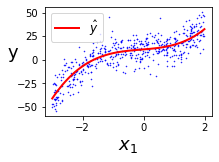

In [56]:
plt.figure(figsize=(3,2))

x1s = np.linspace(x1.min(), x1.max(), 100).reshape(-1,1)
y_pred = grid_model.predict(x1s)

plt.plot(x1, y, 'b.', markersize=1)
plt.plot(x1s, y_pred, 'r-', linewidth=2, label="$\hat y$")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=12)

plt.show()

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
params_rnd = [{
    'poly__degree': range(1,11,1),
    'sgd__alpha': np.random.rand(100),
    'sgd__l1_ratio': np.random.rand(100)
}]

In [59]:
rnd_search = RandomizedSearchCV(pip_reg, param_distributions=params_rnd, n_iter=10, cv=3, scoring='r2', random_state=1)

rnd_search.fit(x1_train, y_train.ravel())

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scal', StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=1))]),
                   param_distributions=[{'poly__degree': range(1, 11),
                                         'sgd__alpha': array([2.33768693e-01, 1.76678893e-01, 3.91099123e-01, 3.20564654e-01,
       8.15476929e-01, 6.13525900e-01, 7.60001...
       0.16744186, 0.26313902, 0.07161028, 0.97867281, 0.2363841 ,
       0.66059836, 0.0896307 , 0.21077094, 0.50282438, 0.10495367,
       0.3888734 , 0.53798772, 0.33920418, 0.55590021, 0.53676832,
       0.3906105 , 0.69627008, 0.67848245, 0.68730315, 0.56149126,
       0.35807991, 0.61311234, 0.

In [60]:
rnd_search.best_score_

0.7290606257660522

In [61]:
rnd_search.best_params_

{'sgd__l1_ratio': 0.8369977822135122,
 'sgd__alpha': 0.18846839966641848,
 'poly__degree': 8}

In [62]:
rnd_model = rnd_search.best_estimator_

rnd_model.score(x1_test, y_test)

0.7194120839707838

In [63]:
rnd_rlt = rnd_search.cv_results_
for mean_score , params in zip(rnd_rlt['mean_test_score'],rnd_rlt['params']):
    print(mean_score, params)

0.7189314645551615 {'sgd__l1_ratio': 0.3473694203728128, 'sgd__alpha': 0.3092463846587796, 'poly__degree': 10}
0.7290606257660522 {'sgd__l1_ratio': 0.8369977822135122, 'sgd__alpha': 0.18846839966641848, 'poly__degree': 8}
0.6245037047380495 {'sgd__l1_ratio': 0.9357362666081998, 'sgd__alpha': 0.1978327846479193, 'poly__degree': 1}
0.6987319145017971 {'sgd__l1_ratio': 0.5370071168405407, 'sgd__alpha': 0.9742126278950913, 'poly__degree': 10}
0.7240949688839109 {'sgd__l1_ratio': 0.404001609054379, 'sgd__alpha': 0.23376869260410593, 'poly__degree': 6}
0.7070408387869961 {'sgd__l1_ratio': 0.6043068436688722, 'sgd__alpha': 0.8709456091610533, 'poly__degree': 8}
0.7178596810323777 {'sgd__l1_ratio': 0.7802245796913637, 'sgd__alpha': 0.688845259018665, 'poly__degree': 3}
0.7069534333029809 {'sgd__l1_ratio': 0.36598334666965426, 'sgd__alpha': 0.5834063146082279, 'poly__degree': 10}
0.7135013371763446 {'sgd__l1_ratio': 0.7441359213695352, 'sgd__alpha': 0.7600017523497489, 'poly__degree': 3}
0.7036